In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import bayesflow as bf
import numpy as np
import pickle
from src.AmortizedMixture import *
from src.models.NormalMixture import *

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
N_CLS=2

In [3]:
model = NormalMixture(n_cls=N_CLS, n_obs=[50, 250], n_rep=[1,10])

In [4]:
trainer = bf.trainers.Trainer(
    amortizer=AmortizedMixture(
        inference_net=IndependentClassificator(num_outputs=N_CLS),
        local_summary_net  = bf.networks.DeepSet(summary_dim=2),
        global_summary_net = bf.networks.DeepSet(summary_dim=N_CLS*2*2)
        ), 
    generative_model=model, 
    configurator=lambda x: x, checkpoint_path="checkpoints/mixture")

INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [5]:
df = model(32)
trainer.amortizer.compute_loss(df)

<tf.Tensor: shape=(), dtype=float32, numpy=1725.8691>

In [6]:
%%time
h = trainer.train_online(epochs=20, iterations_per_epoch=1000, batch_size=64)

Training epoch 20: 100%|██████████| 1000/1000 [03:28<00:00,  4.79it/s, Epoch: 20, Iter: 1000,Loss: 31.082,Avg.Loss: 27.733,LR: 0.00E+00]


CPU times: user 2h 23min 8s, sys: 42min 46s, total: 3h 5min 54s
Wall time: 1h 6min 7s


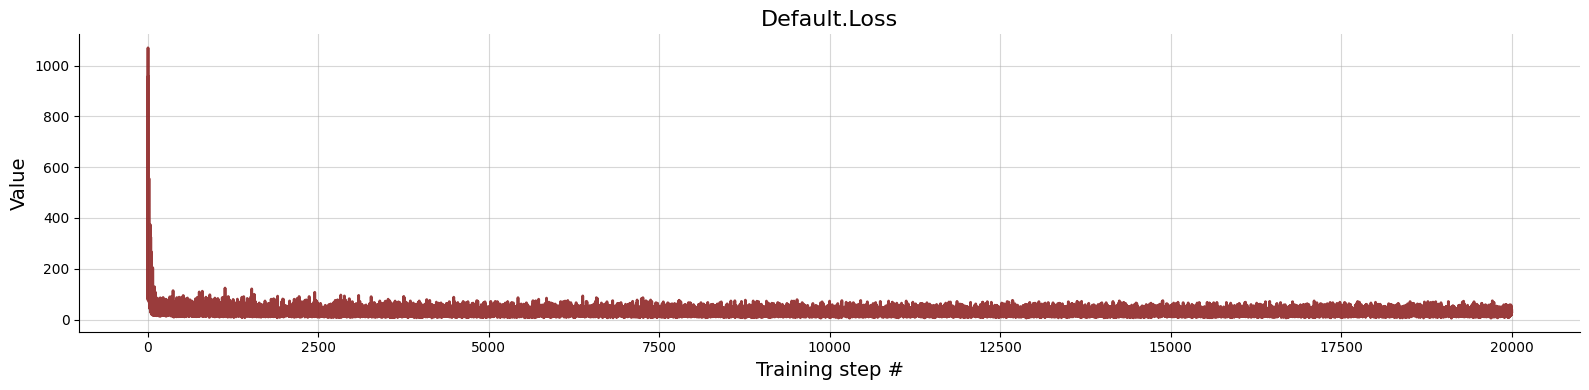

In [7]:
f=bf.diagnostics.plot_losses(h)